# HOUSING USE CASE STUDY PROJECT

Name-Sucharitha A M
Internship batch-16th

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("test.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [3]:
df.shape

(292, 80)

Data set contains 292 rows and 80 columns

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


Data set contains 5 rows and 80 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

This method print the information about the DataFrame including the index type and column type,non-null values and memory usage.

In [6]:
df.shape

(292, 80)

Data set contains 292 rows and 80 columns

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Data set contains 80 columns

In [8]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

Data set conatins dtypes

In [9]:
df.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

Dataset of all sumvalues will be zeros

# Summary statistics

In [10]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
count,292.000000,292.000000,247.000000,292.000000,292.000000,292.000000,292.000000,292.000000,291.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,0.0,292.000000,292.000000,292.000000
mean,755.955479,57.414384,66.425101,10645.143836,6.078767,5.493151,1972.616438,1985.294521,109.171821,439.294521,...,86.397260,47.061644,17.708904,2.489726,15.099315,0.0,NaN,28.184932,6.232877,2007.859589
std,442.565228,43.780649,21.726343,13330.669795,1.356147,1.063267,30.447016,20.105792,175.030021,429.559675,...,121.898836,65.865449,51.892906,30.247488,58.483473,0.0,NaN,224.036218,2.774556,1.322867
min,6.000000,20.000000,21.000000,1526.000000,3.000000,3.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,1.000000,2006.000000
25%,377.750000,20.000000,53.500000,7200.000000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,4.000000,2007.000000
50%,778.000000,50.000000,65.000000,9200.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,369.500000,...,0.000000,28.500000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,6.000000,2008.000000
75%,1152.250000,70.000000,79.000000,11658.750000,7.000000,6.000000,2001.000000,2003.250000,180.000000,700.500000,...,149.250000,66.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,8.000000,2009.000000
max,1456.000000,190.000000,150.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1031.000000,1767.000000,...,728.000000,418.000000,330.000000,407.000000,396.000000,0.0,NaN,3500.000000,12.000000,2010.000000


In [11]:
df.LotFrontage.unique()

array([ 86.,  nan,  75.,  21.,  35., 107.,  32.,  60., 100.,  50., 110.,
        70.,  44.,  71.,  52.,  37.,  62.,  78.,  90.,  68.,  67.,  80.,
        76.,  24.,  57.,  30.,  34.,  55.,  79.,  63.,  98.,  36.,  59.,
        66.,  91.,  85.,  64.,  72.,  43.,  74., 102.,  56.,  83.,  77.,
       120.,  73.,  48.,  93.,  92.,  58.,  40.,  33.,  47.,  51., 138.,
       124.,  42.,  89., 105.,  65.,  45.,  61., 137.,  96., 150.,  69.])

Target/dependent variables is discrete and categorial in nature

In [12]:
df.LotFrontage.value_counts()

60.0     32
85.0     14
50.0     13
70.0     12
80.0      9
         ..
124.0     1
71.0      1
138.0     1
34.0      1
69.0      1
Name: LotFrontage, Length: 65, dtype: int64

Here LotFrontage contains the categorical values

In [13]:
df.loc[df['LotFrontage']==" "]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


Here data set contains zero rows and 80 columns

In [14]:
df["LotFrontage"]=df["LotFrontage"].replace(" ",np.nan)

In [15]:
df.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

In [16]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

Dataset of all sumvalues will be zeros

# Making DataFrame for The  Nominal Data

In [17]:
df_visualization_nominal=df[["MSZoning","SaleType","SaleCondition"]].copy()

In [18]:
df_visualization_nominal.columns

Index(['MSZoning', 'SaleType', 'SaleCondition'], dtype='object')

# Data Visualization

RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64


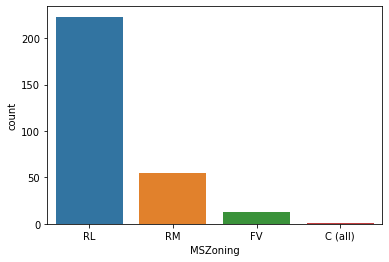

In [19]:
ax = sns.countplot(x="MSZoning",data=df_visualization_nominal)
print(df_visualization_nominal["MSZoning"].value_counts())

Here countplot contains the data visualization of nominal columns of MSZoning

WD       268
New       16
COD        5
ConLw      1
CWD        1
ConLD      1
Name: SaleType, dtype: int64


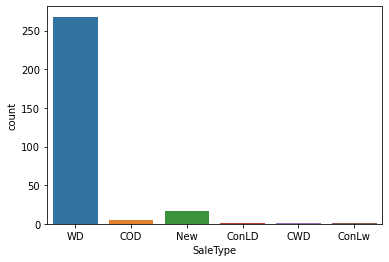

In [20]:
ax = sns.countplot(x="SaleType",data=df_visualization_nominal)
print(df_visualization_nominal["SaleType"].value_counts())

Here countplot contains the data visualization of nominal columns of SaleType

Normal     253
Abnorml     20
Partial     17
Family       2
Name: SaleCondition, dtype: int64


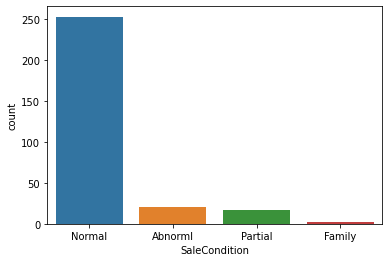

In [21]:
ax = sns.countplot(x="SaleCondition",data=df_visualization_nominal)
print(df_visualization_nominal["SaleCondition"].value_counts())

Here countplot contains the data visualization of nominal columns of SaleCondition

# Making DataFrame of The Ordinal Data

In [22]:
df_visualization_ordinal=df[["Id","MSSubClass"]].copy()

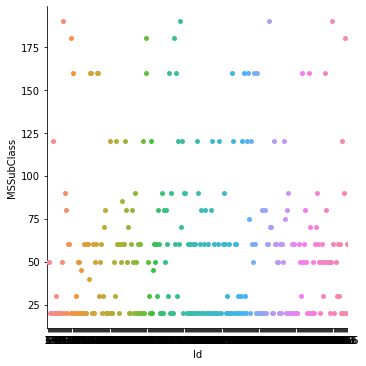

In [23]:
sns.catplot(x="Id",y="MSSubClass",data=df)

Here catplot contains the data visualization of ordinal data of Id and MSSubclass,here x=id and y=MSSubclass

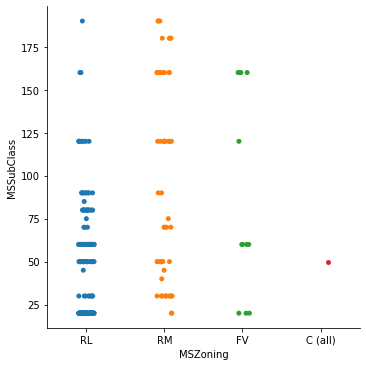

In [24]:
sns.catplot(x="MSZoning",y="MSSubClass",data=df)

Here catplot contains the data visualization of ordinal data of Id and MSSubclass,,here x=MSZoning and y=MSSubclass

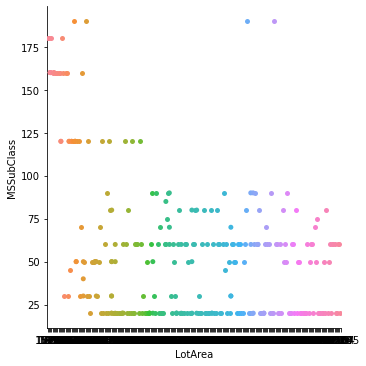

In [25]:
sns.catplot(x="LotArea",y="MSSubClass",data=df)

Here catplot contains the data visualization of ordinal data of Id and MSSubclass,,here x=LotArea and y=MSSubclass

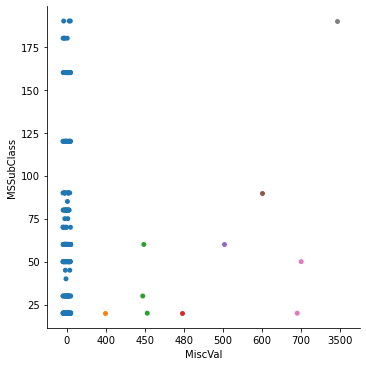

In [26]:
sns.catplot(x="MiscVal",y="MSSubClass",data=df)

Here catplot contains the data visualization of ordinal data of Id and MSSubclass,,here x=rating and y=profile

# checking the distribution of the continuous value of the object type columns

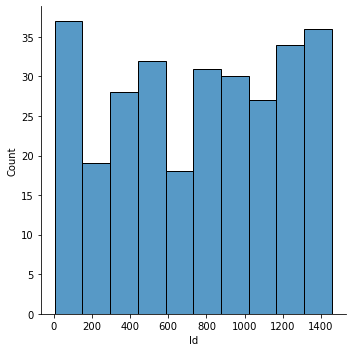

In [27]:
sns.displot(df['Id'])

Data is not normally distributed in this columns,because of viscous problem.

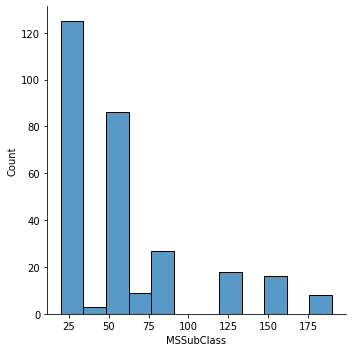

In [28]:
sns.displot(df['MSSubClass'])

Data is not normally distributed in this columns,because of viscous problem.

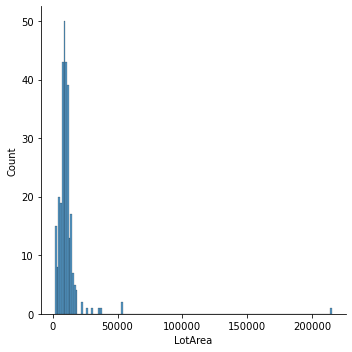

In [29]:
sns.displot(df['LotArea'])

Data is not normally distributed in this columns,because of viscous problem.

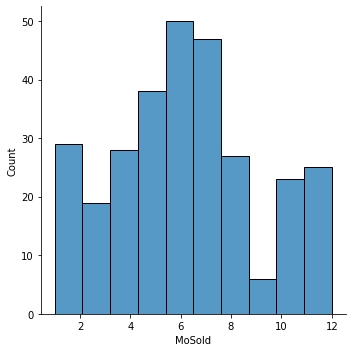

In [30]:
sns.displot(df['MoSold'])

Data is not normally distributed in this columns,because of viscous problem.

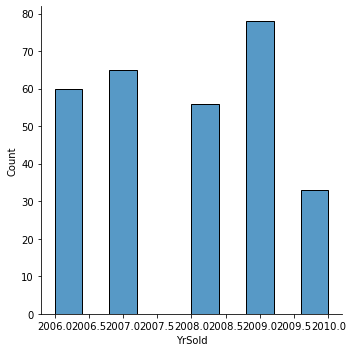

In [31]:
sns.displot(df['YrSold'])

Data is not normally distributed in this columns,because of viscous problem.

In [32]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


Dataset contains 292 rows and 80 columns

# Label Encoding Method

In [33]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['MSZoning']=LE.fit_transform(df['MSZoning'])


In [34]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,2,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,2,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,2,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,2,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,2,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,2,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,2,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,2,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,3,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


<AxesSubplot:>

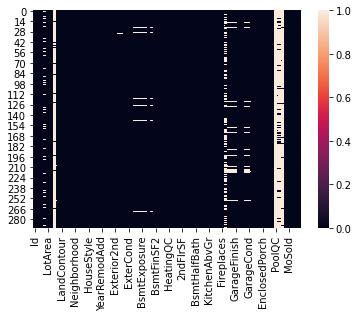

In [35]:
sns.heatmap(df.isnull())

Here heatmap contains all the nullvalues of the dataset.

In [36]:
dfcor=df.corr()
dfcor

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
Id,1.000000,0.035247,-0.087799,-0.017848,-0.045497,0.005823,-0.089945,-0.000174,-0.036955,-0.012331,...,-0.033619,0.049117,-0.000275,-0.134738,-0.012348,NaN,NaN,-0.073024,0.015132,0.034579
MSSubClass,0.035247,1.000000,0.266517,-0.487565,-0.186654,-0.116077,-0.068113,0.041932,-0.023317,0.002761,...,0.028190,-0.097449,-0.047570,-0.045672,-0.072139,NaN,NaN,0.137542,-0.004079,0.044441
MSZoning,-0.087799,0.266517,1.000000,-0.353075,-0.117968,-0.276394,0.191126,-0.378803,-0.159359,-0.107413,...,-0.055536,-0.139292,0.183748,-0.023665,-0.059479,NaN,NaN,0.090554,0.074308,-0.072716
LotFrontage,-0.017848,-0.487565,-0.353075,1.000000,0.383137,0.267153,-0.108327,0.152067,0.059014,0.151632,...,0.007567,0.084421,-0.061468,0.111592,0.077651,NaN,NaN,0.032309,-0.048399,0.064554
LotArea,-0.045497,-0.186654,-0.117968,0.383137,1.000000,0.109161,-0.071113,0.037757,-0.022957,0.062943,...,0.059117,0.067269,-0.055667,0.007832,0.090367,NaN,NaN,-0.020398,-0.034709,0.041735
OverallQual,0.005823,-0.116077,-0.276394,0.267153,0.109161,1.000000,-0.131891,0.560092,0.528983,0.424314,...,0.288506,0.175569,-0.195240,-0.031605,0.086383,NaN,NaN,-0.099852,-0.008545,0.061736
OverallCond,-0.089945,-0.068113,0.191126,-0.108327,-0.071113,-0.131891,1.000000,-0.366830,0.045747,-0.082467,...,-0.078167,-0.065010,0.137325,-0.038308,-0.003167,NaN,NaN,0.019495,-0.043722,-0.001908
YearBuilt,-0.000174,0.041932,-0.378803,0.152067,0.037757,0.560092,-0.366830,1.000000,0.593138,0.284734,...,0.311878,0.179072,-0.457897,0.011253,-0.019113,NaN,NaN,-0.085967,-0.060201,-0.014054
YearRemodAdd,-0.036955,-0.023317,-0.159359,0.059014,-0.022957,0.528983,0.045747,0.593138,1.000000,0.169188,...,0.243722,0.174213,-0.196420,-0.031424,-0.009695,NaN,NaN,-0.103391,0.009670,0.045230
MasVnrArea,-0.012331,0.002761,-0.107413,0.151632,0.062943,0.424314,-0.082467,0.284734,0.169188,1.000000,...,0.196125,0.099761,-0.148557,0.020375,0.120597,NaN,NaN,-0.059927,-0.082810,0.012790


<AxesSubplot:>

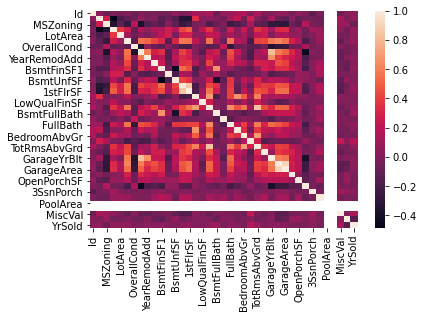

In [37]:
sns.heatmap(dfcor)

Here heatmap containes the difference of corresponding values of dataset.

Light shades are higly corrolated

<AxesSubplot:>

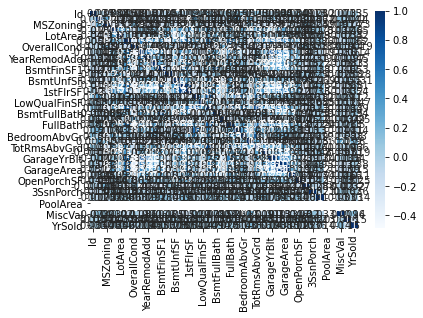

In [38]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

Dark shades are highly correlated

<AxesSubplot:>

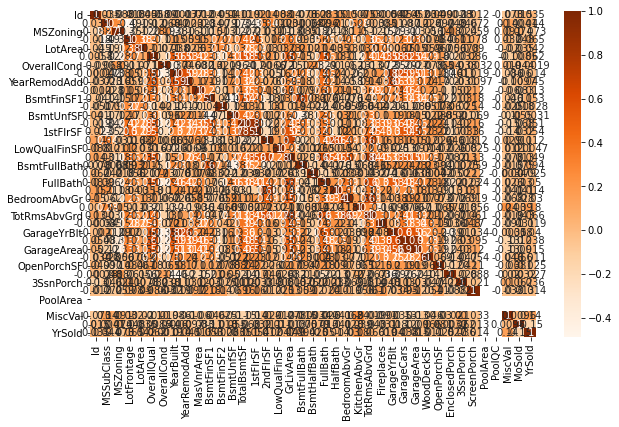

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Oranges',annot=True)

Light shades are higly correlated

# Importing The Dataset

In [40]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [41]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Here Rating,place and miscellaneous_Info contains sum values and remaining values will be zero

In [42]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

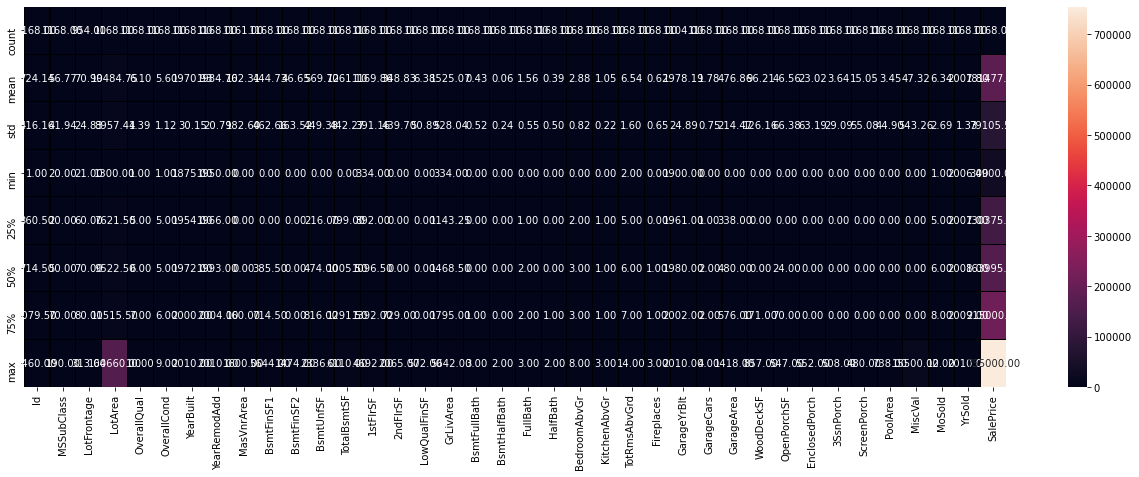

In [43]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt="0.2f")

Here heatmap containes the only one of describe value of dataset.

Light shades are higly describe

# Correlation of the columns with the target columns

In [44]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.004259,-0.006629,-0.029212,-0.036965,0.039761,-0.016942,-0.018590,-0.060652,0.003868,...,-0.027498,-0.013642,0.004885,-0.021773,0.005169,0.065832,0.001304,0.023479,-0.008853,-0.023897
MSSubClass,0.004259,1.000000,-0.365220,-0.124151,0.070462,-0.056978,0.023988,0.056618,0.027868,-0.052236,...,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.016015,-0.038595,-0.060775
LotFrontage,-0.006629,-0.365220,1.000000,0.557257,0.247809,-0.053345,0.118554,0.096050,0.202225,0.247780,...,0.101751,0.167092,0.023118,0.059508,0.033111,0.223429,-0.004559,0.025046,-0.004296,0.341294
LotArea,-0.029212,-0.124151,0.557257,1.000000,0.107188,0.017513,0.005506,0.027228,0.121448,0.221851,...,0.216720,0.093080,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.249499
OverallQual,-0.036965,0.070462,0.247809,0.107188,1.000000,-0.083167,0.575800,0.555945,0.409163,0.219643,...,0.227137,0.341030,-0.098374,0.045919,0.059387,0.072247,-0.025786,0.090638,-0.048759,0.789185
OverallCond,0.039761,-0.056978,-0.053345,0.017513,-0.083167,1.000000,-0.377731,0.080669,-0.137882,-0.028810,...,0.012290,-0.024899,0.056074,0.040476,0.069463,-0.003603,0.075178,0.005519,0.055517,-0.065642
YearBuilt,-0.016942,0.023988,0.118554,0.005506,0.575800,-0.377731,1.000000,0.592829,0.323006,0.227933,...,0.204830,0.191069,-0.373544,0.037079,-0.058760,0.006408,-0.030008,0.031754,-0.013976,0.514408
YearRemodAdd,-0.018590,0.056618,0.096050,0.027228,0.555945,0.080669,0.592829,1.000000,0.181869,0.114430,...,0.197410,0.238755,-0.193574,0.064763,-0.046220,0.006874,-0.001199,0.024663,0.033265,0.507831
MasVnrArea,-0.060652,0.027868,0.202225,0.121448,0.409163,-0.137882,0.323006,0.181869,1.000000,0.267066,...,0.151978,0.131850,-0.102321,0.018721,0.046509,0.013590,-0.027583,0.013432,-0.013493,0.466386
BsmtFinSF1,0.003868,-0.052236,0.247780,0.221851,0.219643,-0.028810,0.227933,0.114430,0.267066,1.000000,...,0.192939,0.108802,-0.082351,0.025485,0.033490,0.154769,0.008314,0.007482,0.005614,0.362874


<AxesSubplot:>

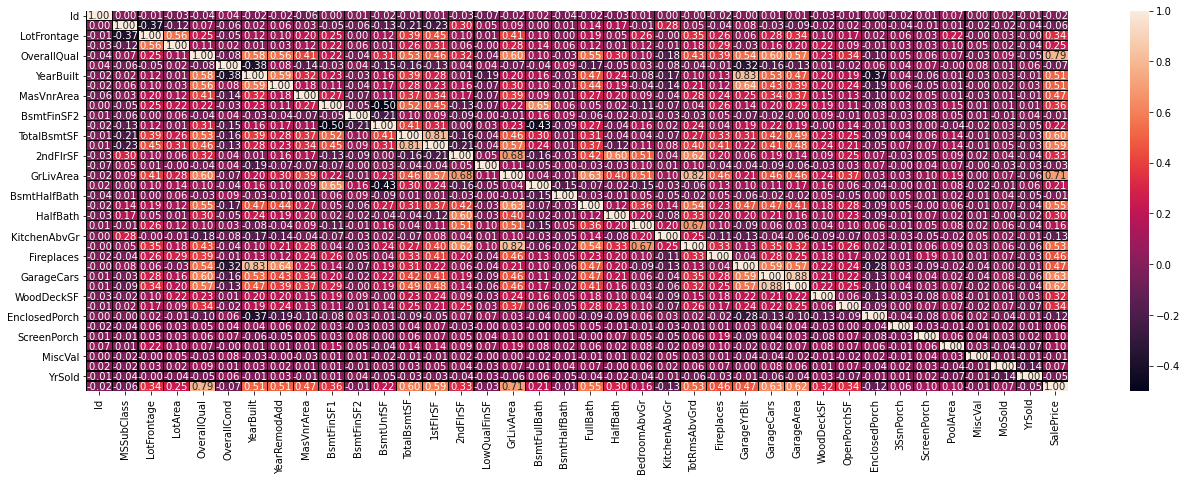

In [45]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt="0.2f")

Here heatmap containes the only one corresponding values of dataset.

Here Fees are higly corrolated

In [46]:
df.skew()

Id                0.026526
MSSubClass        1.422019
LotFrontage       2.450241
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.826173
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.644564
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
S

Here Dataset contains only one skew value

In [47]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

# Outlier Check

<AxesSubplot:>

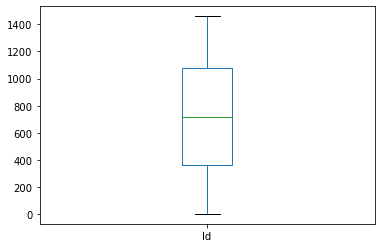

In [48]:
df['Id'].plot.box()

Here all boxplots have no outside the viscous so we cant find here outliers easily.

<AxesSubplot:>

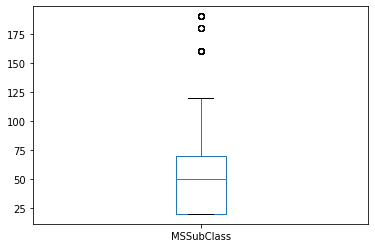

In [49]:
df['MSSubClass'].plot.box()

Here all boxplots have outside the viscous so we can find here outliers easily.

<AxesSubplot:>

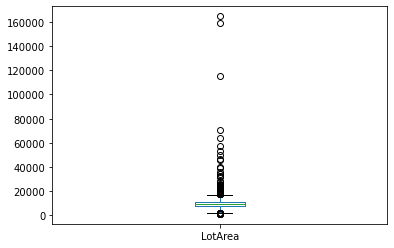

In [50]:
df['LotArea'].plot.box()

Here all boxplots have outside the viscous so we can find here outliers easily.

<AxesSubplot:>

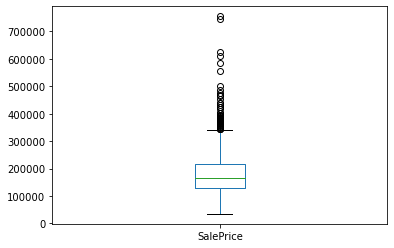

In [51]:
df['SalePrice'].plot.box()

Here all boxplots have outside the viscous so we can find here outliers easily.

In [52]:
df.shape

(1168, 81)

Dataset contains 1168 rows and 81 columns

In [53]:
df.skew()

Id                0.026526
MSSubClass        1.422019
LotFrontage       2.450241
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.826173
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.644564
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
S

In [54]:
df=pd.get_dummies(df)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,127,120,NaN,4928,6,5,1976,1976,0.0,120,...,0,0,0,1,0,0,0,0,1,0
1,889,20,95.0,15865,8,6,1970,1970,0.0,351,...,0,0,0,1,0,0,0,0,1,0
2,793,60,92.0,9920,7,5,1996,1997,0.0,862,...,0,0,0,1,0,0,0,0,1,0
3,110,20,105.0,11751,6,6,1977,1977,480.0,705,...,0,0,0,0,0,0,0,0,1,0
4,422,20,NaN,16635,6,7,1977,2000,126.0,1246,...,0,0,0,1,0,0,0,0,1,0


In [55]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,127,120,NaN,4928,6,5,1976,1976,0.0,120,...,0,0,0,1,0,0,0,0,1,0
1,889,20,95.0,15865,8,6,1970,1970,0.0,351,...,0,0,0,1,0,0,0,0,1,0
2,793,60,92.0,9920,7,5,1996,1997,0.0,862,...,0,0,0,1,0,0,0,0,1,0
3,110,20,105.0,11751,6,6,1977,1977,480.0,705,...,0,0,0,0,0,0,0,0,1,0
4,422,20,NaN,16635,6,7,1977,2000,126.0,1246,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,NaN,9819,5,5,1967,1967,31.0,450,...,0,0,0,1,0,0,0,0,1,0
1164,554,20,67.0,8777,4,5,1949,2003,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1165,196,160,24.0,2280,6,6,1976,1976,0.0,566,...,0,0,0,1,0,0,0,0,1,0
1166,31,70,50.0,8500,4,4,1920,1950,0.0,0,...,0,0,0,1,0,0,0,0,1,0


# Label Encoding Method

In [56]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['LotFrontage']=LE.fit_transform(df['LotFrontage'])


In [57]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,127,120,140,4928,6,5,1976,1976,0.0,120,...,0,0,0,1,0,0,0,0,1,0
1,889,20,65,15865,8,6,1970,1970,0.0,351,...,0,0,0,1,0,0,0,0,1,0
2,793,60,62,9920,7,5,1996,1997,0.0,862,...,0,0,0,1,0,0,0,0,1,0
3,110,20,75,11751,6,6,1977,1977,480.0,705,...,0,0,0,0,0,0,0,0,1,0
4,422,20,204,16635,6,7,1977,2000,126.0,1246,...,0,0,0,1,0,0,0,0,1,0


In [58]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['3SsnPorch']=LE.fit_transform(df['3SsnPorch'])
df['ScreenPorch']=LE.fit_transform(df['ScreenPorch'])
df['PoolArea']=LE.fit_transform(df['PoolArea'])
df['MiscVal']=LE.fit_transform(df['MiscVal'])
df['MoSold']=LE.fit_transform(df['MoSold'])
df['YrSold']=LE.fit_transform(df['YrSold'])
df['Id']=LE.fit_transform(df['Id'])
df['MSSubClass']=LE.fit_transform(df['MSSubClass'])
df['LotFrontage']=LE.fit_transform(df['LotFrontage'])
df['LotArea']=LE.fit_transform(df['LotArea'])



In [59]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,94,11,140,80,6,5,1976,1976,0.0,120,...,0,0,0,1,0,0,0,0,1,0
1,720,0,65,808,8,6,1970,1970,0.0,351,...,0,0,0,1,0,0,0,0,1,0
2,642,5,62,449,7,5,1996,1997,0.0,862,...,0,0,0,1,0,0,0,0,1,0
3,79,0,75,632,6,6,1977,1977,480.0,705,...,0,0,0,0,0,0,0,0,1,0
4,341,0,204,821,6,7,1977,2000,126.0,1246,...,0,0,0,1,0,0,0,0,1,0


In [60]:
df=pd.get_dummies(df)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,94,11,140,80,6,5,1976,1976,0.0,120,...,0,0,0,1,0,0,0,0,1,0
1,720,0,65,808,8,6,1970,1970,0.0,351,...,0,0,0,1,0,0,0,0,1,0
2,642,5,62,449,7,5,1996,1997,0.0,862,...,0,0,0,1,0,0,0,0,1,0
3,79,0,75,632,6,6,1977,1977,480.0,705,...,0,0,0,0,0,0,0,0,1,0
4,341,0,204,821,6,7,1977,2000,126.0,1246,...,0,0,0,1,0,0,0,0,1,0


In [61]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,94,11,140,80,6,5,1976,1976,0.0,120,...,0,0,0,1,0,0,0,0,1,0
1,720,0,65,808,8,6,1970,1970,0.0,351,...,0,0,0,1,0,0,0,0,1,0
2,642,5,62,449,7,5,1996,1997,0.0,862,...,0,0,0,1,0,0,0,0,1,0
3,79,0,75,632,6,6,1977,1977,480.0,705,...,0,0,0,0,0,0,0,0,1,0
4,341,0,204,821,6,7,1977,2000,126.0,1246,...,0,0,0,1,0,0,0,0,1,0


In [62]:

df=pd.get_dummies(df)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,94,11,140,80,6,5,1976,1976,0.0,120,...,0,0,0,1,0,0,0,0,1,0
1,720,0,65,808,8,6,1970,1970,0.0,351,...,0,0,0,1,0,0,0,0,1,0
2,642,5,62,449,7,5,1996,1997,0.0,862,...,0,0,0,1,0,0,0,0,1,0
3,79,0,75,632,6,6,1977,1977,480.0,705,...,0,0,0,0,0,0,0,0,1,0
4,341,0,204,821,6,7,1977,2000,126.0,1246,...,0,0,0,1,0,0,0,0,1,0


In [63]:
pd.set_option("display.max_columns", 35)

In [64]:
df.drop(['Id','LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1'],axis=1,inplace=True)

In [65]:
df.head()

,MSSubClass,OverallQual,OverallCond,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,...,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,11,6,5,0,958,1078,958,0,0,958,0,0,2,0,2,1,5,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,8,6,823,1043,2217,2217,0,0,2217,1,0,2,0,4,1,8,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,5,7,5,0,255,1117,1127,886,0,2013,1,0,2,1,3,1,8,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,6,6,0,1139,1844,1844,0,0,1844,0,0,2,0,3,1,7,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,6,7,0,356,1602,1602,0,0,1602,0,1,2,0,3,1,8,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [66]:
df.drop(['BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','MSSubClass'],axis=1,inplace=True)

In [67]:
df.head()

,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,...,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,6,5,0,0,0,2,0,2,1,5,1,1977.0,2,440,0,205,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,8,6,0,1,0,2,0,4,1,8,1,1970.0,2,621,81,207,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,7,5,0,1,0,2,1,3,1,8,1,1997.0,2,455,180,130,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,6,6,0,0,0,2,0,3,1,7,1,1977.0,2,546,0,122,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6,7,0,0,1,2,0,3,1,8,1,1977.0,2,529,240,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [68]:
df.drop(['GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF'],axis=1,inplace=True)

In [69]:
df.head()

,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,...,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,6,5,0,0,0,2,0,2,1,5,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,8,6,0,1,0,2,0,4,1,8,1,2,0,0,48,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,7,5,0,1,0,2,1,3,1,8,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,6,6,0,0,0,2,0,3,1,7,1,2,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6,7,0,0,1,2,0,3,1,8,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [70]:
df.drop(['ScreenPorch'],axis=1,inplace=True)

In [71]:
df.head()

,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,MoSold,...,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,6,5,0,0,0,2,0,2,1,5,1,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,8,6,0,1,0,2,0,4,1,8,1,2,0,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,7,5,0,1,0,2,1,3,1,8,1,2,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,6,6,0,0,0,2,0,3,1,7,1,2,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6,7,0,0,1,2,0,3,1,8,1,2,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [72]:
df.isnull().sum()

OverallQual              0
OverallCond              0
LowQualFinSF             0
BsmtFullBath             0
BsmtHalfBath             0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 268, dtype: int64

In [73]:
df.skew()

OverallQual               0.175082
OverallCond               0.580714
LowQualFinSF              8.666142
BsmtFullBath              0.627106
BsmtHalfBath              4.264403
                           ...    
SaleCondition_AdjLand    17.021969
SaleCondition_Alloca      9.725564
SaleCondition_Family      7.878065
SaleCondition_Normal     -1.574806
SaleCondition_Partial     2.817283
Length: 268, dtype: float64

# Removing The Outliers

In [74]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.07516928, 0.53021681, 0.12541783, ..., 0.12510865, 0.48577653,
        0.31919711],
       [1.36413763, 0.35957232, 0.12541783, ..., 0.12510865, 0.48577653,
        0.31919711],
       [0.64448417, 0.53021681, 0.12541783, ..., 0.12510865, 0.48577653,
        0.31919711],
       ...,
       [0.07516928, 0.35957232, 0.12541783, ..., 0.12510865, 0.48577653,
        0.31919711],
       [1.5144762 , 1.42000595, 0.12541783, ..., 0.12510865, 0.48577653,
        0.31919711],
       [0.07516928, 0.53021681, 0.12541783, ..., 0.12510865, 0.48577653,
        0.31919711]])

Here Removing the otliers of df

In [75]:
threshold=3
print(np.where(z>3))

(array([   0,    0,    0, ..., 1166, 1166, 1167], dtype=int64), array([ 58,  91, 122, ..., 239, 241,  53], dtype=int64))


In [76]:
df_new=df[(z<3).all(axis=1)]
df_new

,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,MoSold,...,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial


Here new Data set contains 0 rows and 268 columns

In [77]:
df.shape

(1168, 268)

Dataset contains 1168 rows and 268 columns

In [78]:
df_new.shape

(0, 268)

New data set contains 0 rows and 268 columns

# StandardScaler Method

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(df)

In [80]:
scaledX

array([[-0.07516928, -0.53021681, -0.12541783, ..., -0.12510865,
         0.48577653, -0.31919711],
       [ 1.36413763,  0.35957232, -0.12541783, ..., -0.12510865,
         0.48577653, -0.31919711],
       [ 0.64448417, -0.53021681, -0.12541783, ..., -0.12510865,
         0.48577653, -0.31919711],
       ...,
       [-0.07516928,  0.35957232, -0.12541783, ..., -0.12510865,
         0.48577653, -0.31919711],
       [-1.5144762 , -1.42000595, -0.12541783, ..., -0.12510865,
         0.48577653, -0.31919711],
       [-0.07516928, -0.53021681, -0.12541783, ..., -0.12510865,
         0.48577653, -0.31919711]])

Here standardscaler contains scaledX values

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(df)

In [82]:
scaledX

array([[-0.07516928, -0.53021681, -0.12541783, ..., -0.12510865,
         0.48577653, -0.31919711],
       [ 1.36413763,  0.35957232, -0.12541783, ..., -0.12510865,
         0.48577653, -0.31919711],
       [ 0.64448417, -0.53021681, -0.12541783, ..., -0.12510865,
         0.48577653, -0.31919711],
       ...,
       [-0.07516928,  0.35957232, -0.12541783, ..., -0.12510865,
         0.48577653, -0.31919711],
       [-1.5144762 , -1.42000595, -0.12541783, ..., -0.12510865,
         0.48577653, -0.31919711],
       [-0.07516928, -0.53021681, -0.12541783, ..., -0.12510865,
         0.48577653, -0.31919711]])

In [83]:
from sklearn.decomposition import PCA

testpca = PCA()
Y = testpca.fit(scaledX)

In [84]:
Y.explained_variance_ratio_

array([5.75802435e-02, 2.89963552e-02, 2.06751823e-02, 1.76188523e-02,
       1.72646256e-02, 1.56563271e-02, 1.40142215e-02, 1.28734602e-02,
       1.25461810e-02, 1.22791396e-02, 1.16086866e-02, 1.11678314e-02,
       1.07607156e-02, 1.06863829e-02, 1.04906730e-02, 1.01248151e-02,
       9.86672665e-03, 9.53226089e-03, 9.42098027e-03, 9.14445197e-03,
       9.06264234e-03, 8.76673345e-03, 8.64089277e-03, 8.54871448e-03,
       8.42995568e-03, 8.36563728e-03, 8.05044122e-03, 8.01597330e-03,
       7.88591697e-03, 7.76726715e-03, 7.72052731e-03, 7.50828379e-03,
       7.43596699e-03, 7.28404196e-03, 7.26921743e-03, 7.24686165e-03,
       7.13095274e-03, 7.08225897e-03, 6.94322398e-03, 6.86234216e-03,
       6.72324994e-03, 6.63060103e-03, 6.57986492e-03, 6.51787474e-03,
       6.44423792e-03, 6.35081010e-03, 6.22324503e-03, 6.16206205e-03,
       6.12611244e-03, 6.03832368e-03, 5.94219778e-03, 5.82966555e-03,
       5.78075450e-03, 5.75027717e-03, 5.72798384e-03, 5.61103270e-03,
      

In [85]:
var_cumu = np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([  5.75802435,   8.65765986,  10.72517809,  12.48706332,
        14.21352587,  15.77915858,  17.18058073,  18.46792675,
        19.72254485,  20.95045881,  22.11132747,  23.22811061,
        24.30418217,  25.37282046,  26.42188775,  27.43436926,
        28.42104192,  29.37426801,  30.31636604,  31.23081124,
        32.13707547,  33.01374882,  33.87783809,  34.73270954,
        35.57570511,  36.41226884,  37.21731296,  38.01891029,
        38.80750198,  39.5842287 ,  40.35628143,  41.10710981,
        41.85070651,  42.5791107 ,  43.30603245,  44.03071861,
        44.74381389,  45.45203978,  46.14636218,  46.8325964 ,
        47.50492139,  48.16798149,  48.82596799,  49.47775546,
        50.12217925,  50.75726026,  51.37958477,  51.99579097,
        52.60840221,  53.21223458,  53.80645436,  54.38942092,
        54.96749637,  55.54252408,  56.11532247,  56.67642574,
        57.22897642,  57.77814141,  58.31995106,  58.8540743 ,
        59.37921797,  59.90060403,  60.41819501,  60.92

In [86]:
k = np.argmax(var_cumu>99)
print("Number of components explaining 99% variance:",k)

Number of components explaining 99% variance: 205


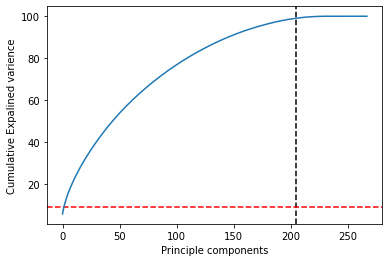

In [87]:
plt.ylabel('Cumulative Expalined varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color="k",linestyle="--")
plt.axhline(y=9, color="r",linestyle="--")

plt.plot(var_cumu)
plt.show()

Here ylabel contains cumulative explained varience and xlabel contains principle components.

# Handling The Missing Values

In [88]:
df.isnull().sum()

OverallQual              0
OverallCond              0
LowQualFinSF             0
BsmtFullBath             0
BsmtHalfBath             0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 268, dtype: int64

Dataset contains all sum values will be zero

In [89]:
df["OverallQual"]=df["OverallQual"].fillna(df["OverallQual"].mean())
df["OverallCond"]=df["OverallCond"].fillna(df["OverallCond"].median())

# Skewness checking

In [90]:
df.skew()

OverallQual               0.175082
OverallCond               0.580714
LowQualFinSF              8.666142
BsmtFullBath              0.627106
BsmtHalfBath              4.264403
                           ...    
SaleCondition_AdjLand    17.021969
SaleCondition_Alloca      9.725564
SaleCondition_Family      7.878065
SaleCondition_Normal     -1.574806
SaleCondition_Partial     2.817283
Length: 268, dtype: float64

# Model Building

In [91]:
x_train = df.drop(['OverallQual'],axis=1)
y_train = df.OverallQual


In [92]:
x_train.head()

,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,...,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,5,0,0,0,2,0,2,1,5,1,2,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,6,0,1,0,2,0,4,1,8,1,2,0,0,0,0,9,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,5,0,1,0,2,1,3,1,8,1,2,0,0,0,0,5,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,6,0,0,0,2,0,3,1,7,1,2,0,0,0,0,0,4,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,7,0,0,1,2,0,3,1,8,1,2,0,0,0,0,5,3,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [93]:
y_train.head()

0    6
1    8
2    7
3    6
4    6
Name: OverallQual, dtype: int64

In [94]:
x_train.shape

(1168, 267)

 x_train contains the data set 1168 rows and 267 columns

In [95]:
y_train.shape

(1168,)

y_train contains the data set 1168 rows and zero columns

# Regressor Methods

In [96]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [97]:
x= df.drop(['OverallQual'],axis=1)
y = df["OverallQual"]
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=0, test_size=0.2)

In [98]:
from sklearn.metrics import mean_squared_error
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeRegressor
    lm=DecisionTreeRegressor()
    lm.fit(x_train,y_train)
    y_pred=lm.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print(rmse)

1.0115908571038816
0.9481369788010318
0.9329878462464145
1.0090266176003024
0.9508654361791721
0.9843332347830411
0.9175886398147584
0.953586086764308
1.0077420510481723
1.0025873264460603
1.0640133233806832
1.030619311774774
0.969749713983985
0.8845244031054876
0.9467698014801795
0.9710845387231486
0.953586086764308
0.9522267331341505
0.8874484586945758
0.9856483098314404
0.9562989971869287
0.9522267331341505
0.9260199530074261
0.9549435053685615
0.9371437146824984
0.9357604759733029
0.9710845387231486
0.9803774254709545
1.0356345205252802
0.9576525704011111
0.9481369788010318
1.015425074981682
0.9315984369181787
0.9670745372626464
0.9843332347830411
1.0331299593726666
0.8712447173515334
0.9175886398147584
0.8947167902275143
0.9603539934555976
0.9147609331223319
0.9062248745847038
0.9830164004345584
0.9119244582840074
0.953586086764308
0.9454006470379048
0.9260199530074261
0.9508654361791721
0.9508654361791721
0.9643919397586764
0.9357604759733029
0.9062248745847038
0.9750780492209529

In [99]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)


DecisionTreeRegressor()

In [100]:
y_pred = regressor.predict(x_test)

In [101]:
y_pred

array([ 6.,  7.,  6.,  9.,  5.,  6.,  8.,  5.,  8.,  4.,  5.,  6.,  7.,
        8.,  8.,  5.,  4.,  4.,  6.,  9.,  4.,  5.,  8.,  7.,  7.,  7.,
        6.,  5.,  7.,  6.,  5.,  7.,  6.,  8.,  7.,  4.,  7.,  7.,  5.,
        5.,  8.,  6.,  8.,  8.,  7.,  6.,  6.,  7.,  5.,  7.,  4.,  4.,
        6.,  6.,  9.,  6.,  4.,  5.,  5.,  5.,  5.,  6.,  5.,  4.,  5.,
        5.,  6.,  7.,  6.,  5.,  7.,  7.,  5.,  8.,  6.,  7.,  4.,  6.,
        8.,  5.,  6.,  6.,  5.,  5.,  5.,  8.,  8.,  7.,  6.,  8.,  2.,
        7.,  5.,  4.,  7.,  5.,  7.,  6.,  7.,  5.,  8.,  4.,  7.,  8.,
        6.,  5.,  9.,  5.,  7.,  5.,  7.,  5.,  5.,  5.,  5.,  5.,  7.,
        4.,  4.,  5.,  8.,  6.,  6.,  8.,  4.,  9.,  6.,  6.,  5.,  8.,
        4.,  6.,  6.,  5.,  5.,  4.,  7.,  5.,  5.,  7.,  7.,  7.,  5.,
        8.,  4.,  6.,  4.,  5.,  4.,  6.,  8.,  5.,  4., 10.,  6.,  7.,
        5.,  6.,  6.,  7.,  6.,  6.,  7.,  6.,  6.,  5.,  8.,  8.,  6.,
        8.,  7.,  6.,  4.,  4.,  5.,  3.,  9.,  5.,  4.,  5.,  7

In [102]:
dt_accuracy = round(regressor.score(x_train,y_train)*100,2)
dt_accuracy

100.0

In [103]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [104]:
y_pred = regressor.predict(x_test)
y_pred

array([6.64, 6.83, 5.49, 9.24, 5.28, 5.24, 7.98, 5.31, 8.49, 4.79, 5.84,
       6.09, 6.04, 7.74, 7.57, 5.55, 4.2 , 4.05, 6.4 , 9.15, 4.37, 5.06,
       8.08, 7.25, 6.4 , 7.26, 6.4 , 4.95, 5.55, 6.05, 3.91, 6.7 , 5.63,
       8.03, 7.12, 4.73, 7.76, 6.49, 4.92, 5.13, 7.99, 5.58, 6.75, 6.77,
       5.91, 6.65, 6.68, 7.36, 5.39, 6.92, 5.26, 4.49, 5.45, 5.93, 8.53,
       6.37, 5.37, 5.05, 5.03, 4.43, 4.76, 5.62, 5.14, 4.56, 4.9 , 5.35,
       6.1 , 6.68, 5.48, 5.03, 6.95, 7.81, 5.17, 7.34, 5.84, 6.14, 4.3 ,
       6.64, 7.67, 4.25, 4.8 , 5.7 , 5.11, 5.08, 5.64, 8.7 , 7.21, 7.14,
       5.86, 7.82, 3.06, 6.83, 4.57, 4.24, 6.56, 4.65, 6.08, 5.62, 6.87,
       4.73, 7.86, 4.41, 7.3 , 7.49, 5.58, 5.62, 8.82, 5.4 , 6.07, 5.87,
       6.51, 5.47, 5.02, 5.55, 5.53, 5.58, 7.48, 4.77, 5.61, 4.79, 7.81,
       6.75, 5.55, 8.04, 5.47, 8.2 , 5.1 , 4.75, 4.88, 7.21, 4.72, 5.61,
       6.98, 5.13, 5.01, 4.36, 7.57, 5.33, 5.27, 6.53, 7.7 , 5.66, 5.66,
       7.61, 5.05, 5.71, 4.55, 5.05, 4.81, 6.14, 8.

In [105]:
rf_accuracy = round(regressor.score(x_train,y_train)*100,2)
rf_accuracy

96.33

In [106]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [107]:
y_pred = regressor.predict(x_test)
y_pred

array([ 6.4680319 ,  6.88456213,  4.95642641,  8.58449442,  5.51750141,
        5.10986602,  8.03068429,  5.32770045,  8.34535761,  5.31419505,
        6.13659435,  6.26626658,  6.25293563,  7.85722329,  6.97054711,
        5.71487022,  3.12548302,  4.07597179,  7.96214968,  9.65717691,
        3.99744081,  4.75488402,  8.09703524,  6.89879045,  6.79939779,
        6.99483964,  6.83940051,  5.12195423,  6.12250969,  6.41310681,
        2.57706066,  6.14674018,  5.20714841,  8.24243381,  5.55819304,
        3.65876135,  7.8484554 ,  6.36519241,  5.07242396,  4.88332853,
        7.77694087,  5.78851586,  6.76298217,  6.08473397,  6.36893481,
        6.19488697,  7.02530418,  7.0085497 ,  5.72230712,  6.68145773,
        5.43912599,  4.90107598,  5.19509813,  5.52721609,  9.04412876,
        6.86323134,  5.39529276,  6.07494405,  4.93929829,  4.17425652,
        4.99265586,  5.90990955,  4.99288089,  5.49554838,  5.13901711,
        5.17206975,  6.6538761 ,  7.26323822,  5.86088893,  5.46

In [108]:
lr_accuracy = round(regressor.score(x_train,y_train)*100,2)
lr_accuracy

85.05

In [109]:
from sklearn.naive_bayes import GaussianNB
regressor = GaussianNB()
regressor.fit(x_train,y_train)

GaussianNB()

In [110]:
y_pred = regressor.predict(x_test)
y_pred

array([ 7,  7,  7,  9,  5,  5,  7,  5,  9,  5,  7,  7,  5,  9,  8,  7,  5,
        2,  8,  9,  4,  5,  9,  8,  7,  8,  8,  5,  7,  7,  4,  7,  7,  9,
        8,  4,  9,  9,  5,  5,  8,  4,  8,  7,  7,  7,  7,  9,  5,  7,  7,
        4,  5,  7,  9,  7,  7,  5,  5,  5,  5,  5,  5,  4,  5,  7,  7,  7,
        7,  5,  7,  9,  7,  9,  7,  8,  2,  9,  9,  2,  4, 10,  5,  5,  7,
        9,  8,  8,  7,  8,  2,  8,  2,  4,  7,  5,  7,  7,  7,  5,  9,  2,
        9,  8,  7,  7,  9,  7,  7,  7,  7,  7,  5,  5,  7,  7,  8,  5,  7,
        5,  9,  7,  7,  8,  7,  9,  5,  4,  5,  8,  4,  7,  7,  5,  5,  5,
        8,  6,  7,  7,  9,  7,  7,  9,  5,  7,  4,  5,  5,  7,  9,  5,  5,
        9,  7,  8,  5,  7,  7,  7,  7,  4,  7,  7,  4,  5,  8,  8,  8,  7,
        7,  7,  4,  5,  4,  5,  9,  5,  3,  5,  7,  7,  5,  8,  7,  7,  8,
        5,  7,  7,  7,  9,  7,  9,  5,  4,  7,  8,  9,  7,  7,  7,  7,  7,
        8,  7,  7,  7,  5,  8,  2,  5,  4,  7,  7,  5,  7,  8,  9,  4,  9,
        9,  9,  7,  4,  5

In [111]:
nb_accuracy = round(regressor.score(x_train,y_train)*100,2)
nb_accuracy

40.54

In [112]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(x_train,y_train)

SVR()

In [113]:
y_pred = regressor.predict(x_test)
y_pred

array([5.98088331, 6.28165514, 5.72107334, 8.86369194, 5.1765401 ,
       4.91839563, 8.30204476, 5.32870584, 8.09413186, 5.13687032,
       6.08921071, 6.1107005 , 5.63276337, 7.88106409, 7.38462371,
       5.38053168, 4.50814568, 4.34818685, 7.470734  , 9.05471564,
       4.40533658, 4.93116757, 8.19349322, 7.70053601, 7.16495612,
       7.16492107, 7.24638271, 5.20651324, 5.44333076, 6.12145844,
       4.42976535, 6.12113584, 6.80763095, 8.14521355, 7.83135663,
       4.6644439 , 8.34425437, 7.24638269, 5.00182185, 5.28762632,
       7.55596708, 4.70279979, 7.07155846, 5.710287  , 5.82715344,
       6.71114175, 5.76865451, 7.16492106, 5.37012781, 6.40772486,
       5.95944215, 4.76056573, 5.33903152, 5.94859751, 8.52968388,
       6.19437816, 5.87594879, 5.08795611, 5.18648317, 4.57913939,
       5.15663426, 5.07828567, 5.44122756, 4.3993712 , 5.41185309,
       5.54711447, 5.52795293, 6.01897947, 5.59197502, 5.2773936 ,
       6.63214808, 7.84366313, 5.42232882, 7.14823564, 5.72107

In [114]:
svm_accuracy = round(regressor.score(x_train,y_train)*100,2)
svm_accuracy

67.91

In [115]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(x_train,y_train)


KNeighborsRegressor()

In [116]:
y_pred = regressor.predict(x_test)
y_pred

array([6. , 6.4, 5.8, 9.6, 5.2, 5.2, 8. , 5. , 8.2, 5.8, 5.8, 6. , 5.6,
       7.8, 7.2, 5.4, 5.2, 4.6, 7.4, 9.6, 4.8, 5.4, 8.6, 7.4, 7.6, 7.6,
       7.4, 5.4, 5.2, 5.8, 4.8, 5.8, 6.6, 8. , 7.8, 4.4, 8.4, 7.4, 4.8,
       5.2, 6.8, 4.8, 7. , 5.8, 6. , 6.6, 7. , 7.6, 5.2, 6.6, 6. , 4.4,
       6. , 6.4, 8.8, 6. , 5.8, 5.4, 5.4, 5. , 5.2, 5. , 5.2, 4.4, 5.2,
       5. , 6. , 6.2, 6. , 5.4, 6.8, 7.6, 5.2, 7.4, 6. , 7.2, 4.4, 7.4,
       7.2, 3.8, 5. , 5. , 5.2, 5. , 6. , 8.4, 6.4, 7.2, 5. , 7.2, 3.8,
       7.2, 4.6, 4.4, 6.2, 4.8, 5.8, 6.2, 7.2, 4.8, 7.6, 4. , 6.8, 7.6,
       5.6, 6.6, 8.4, 5.6, 5.4, 7. , 6. , 5.4, 4.8, 4.8, 5.8, 5.2, 7.4,
       4.4, 7. , 5.4, 8.2, 6. , 5.2, 7.2, 5.6, 8.6, 4.6, 4.8, 5.4, 7.2,
       4.8, 6. , 7. , 5.6, 5. , 4.8, 7.8, 5.2, 5. , 6.2, 8. , 6.6, 6.2,
       7.6, 5.6, 6.6, 4. , 6. , 4.8, 6. , 7.4, 6. , 5.2, 9.4, 7. , 7. ,
       4.6, 6. , 6. , 7. , 5.2, 4.6, 6.6, 6.6, 4.6, 5. , 7.6, 7.4, 7. ,
       6.6, 6.6, 6.2, 4.2, 5.2, 4.2, 4.6, 8.6, 4.8, 4.6, 5. , 7.

In [117]:
knn_accuracy = round(regressor.score(x_train,y_train)*100,2)
knn_accuracy

74.11

# Cross Validation Methods

In [118]:
from sklearn.model_selection import cross_val_score

In [119]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.5341330672556698


In [120]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.7514532873694375


In [121]:
from sklearn.svm import SVR
regressor = SVR()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.6651674684363482


In [122]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.6873175681294348


In [123]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.6147195215352733


In [124]:
from sklearn.naive_bayes import GaussianNB
regressor = GaussianNB()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.34844649866109095


# Hyperparametr Tunnings

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}

In [127]:
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [128]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [129]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 3}

In [130]:
from sklearn.model_selection import RandomizedSearchCV

In [131]:
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features=['auto','sqrt']
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
             'min-samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'bootstrap':bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'min-samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


# Final Model

In [132]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)
Final_mod = DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((regressor.score(x_test,y_test)*100))

52.810607949132105


In [133]:
from sklearn.ensemble import RandomForestRegressor
regressor =RandomForestRegressor()
regressor.fit(x_train,y_train)
Final_mod =RandomForestRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((regressor.score(x_test,y_test)*100))

75.0327649170016


# Saving The Model

In [134]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']

Here the saving model is finalmodel.pkl

# Prediction Method

In [135]:
Final_mod = DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
preds = regressor.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[6.55 6.75 5.55 9.17 5.26 5.3  8.03 5.36 8.59 4.85 5.89 5.96 5.98 7.77
 7.55 5.58 4.43 4.17 6.34 9.19 4.41 5.17 8.16 7.39 6.36 7.22 6.51 4.91
 5.56 6.06 4.09 6.73 5.63 7.98 6.89 4.55]
[ 6  7  6  8  5  5  7  6 10  5  5  7  5  9  6  5  4  4  7  9  5  6  8  8
  6  7  6  5  6  7  4  7  6  8  7  6]


In [136]:
Final_mod = RandomForestRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
preds = regressor.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[6.55 6.75 5.55 9.17 5.26 5.3  8.03 5.36 8.59 4.85 5.89 5.96 5.98 7.77
 7.55 5.58 4.43 4.17 6.34 9.19 4.41 5.17 8.16 7.39 6.36 7.22 6.51 4.91
 5.56 6.06 4.09 6.73 5.63 7.98 6.89 4.55]
[ 6  7  6  8  5  5  7  6 10  5  5  7  5  9  6  5  4  4  7  9  5  6  8  8
  6  7  6  5  6  7  4  7  6  8  7  6]


The train and test data is balanced most regressor methods hit the 54% accuracy with the datset.

The train and test data is balanced most regressor methods hit the 76% accuracy with the datset.